https://www.kaggle.com/c/digit-recognizer

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import pickle

In [27]:
random_state = 42

## Read data

In [2]:
train = pd.read_csv('Data/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
test = pd.read_csv('Data/test.csv')

In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.shape

(28000, 784)

In [9]:
sample_submission = pd.read_csv('Data/sample_submission.csv')

In [10]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
sample_submission.shape

(28000, 2)

## Understand data

In [122]:
def plot_image_grid(data, figsize = (15,15), rows = 5, columns = 5, start_index=1, cmap='Greys',
                    pixel_columns = None, image_resolution = None, label_column = None, marker_columns = None):
    total = rows*columns
    fig = plt.figure(figsize = figsize)
    fig.set_facecolor('white')
    if start_index+total > len(data) + 1:
        raise Exception('Index exceed for rows in data')
    if pixel_columns is None:
        pixel_columns = data.columns
    if image_resolution is None:
        if not np.sqrt(len(pixel_columns)) == int(np.sqrt(len(pixel_columns))):
            raise Exception('Please specify resolution of data')
        image_resolution = [int(np.sqrt(len(pixel_columns)))]*2        
    if label_column is None :
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(start_index, start_index+total, 1):
        ax = fig.add_subplot(rows, columns, i + 1 - start_index, xticks=[], yticks=[])
        pixel_data = data[pixel_columns].iloc[i-1].values.reshape(image_resolution)
        ax.imshow(pixel_data, cmap=cmap, interpolation='nearest')
        if label_column is not None:
            ax.set_xlabel(str(data[label_column].iloc[i-1]), color= 'black', fontsize=15)
        if  marker_columns is not None:
            marker_x_data = train[marker_columns[0]].iloc[i-1]
            marker_y_data = train[marker_columns[1]].iloc[i-1]
            ax.scatter(marker_x_data, marker_y_data, s=50, c='yellow', marker='x')
    plt.show()

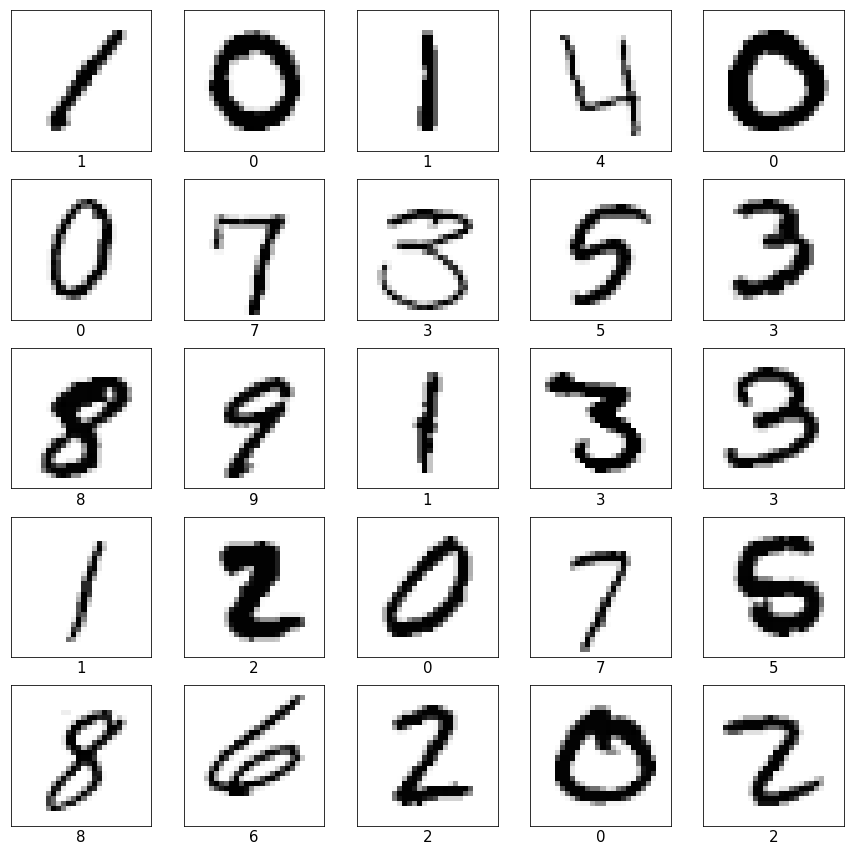

In [13]:
plot_image_grid(train, pixel_columns = train.columns[1:], label_column = 'label')

In [14]:
train_X = train.iloc[:,1:]
train_Y = train.iloc[:,0:1]

In [15]:
train_X.iloc[:,500:510].describe()

,pixel500,pixel501,pixel502,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,5.052071,1.327905,0.204286,0.018095,0.002643,0.005333,0.171571,1.509048,7.523024,20.148476
std,30.290837,15.300959,5.724401,1.264364,0.384239,0.669279,5.253845,16.490679,38.127582,61.897775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,253.000000,121.000000,60.000000,126.000000,255.000000,255.000000,255.000000,255.000000


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std_scaler = StandardScaler()
train_X_scaled = std_scaler.fit_transform(train_X)

In [21]:
std_scaler_pickle = 'SaveFiles/std_scaler_pickle.pkl'
with open(std_scaler_pickle, 'wb') as file:
    pickle.dump(std_scaler, file)

In [22]:
pd.DataFrame(train_X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


## Logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegressionCV

Things that can affect the accuracy of the model  
- penalty : ‘l1’, ‘l2’, or ‘elasticnet’
- scoring : default is accuracy , which should work for a balanced dataset
- solver : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
- max_iter 
- refit
- multi_class : ‘ovr’, ‘multinomial’, ‘auto’

In [28]:
lr_model = LogisticRegressionCV(n_jobs=-1, class_weight='balanced', random_state=random_state, multi_class='auto')

In [29]:
lr_model.fit(train_X_scaled, train_Y)

C:\Users\Maddy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maddy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Maddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [30]:
lr_model_pickle = 'SaveFiles/lr_model_pickle.pkl'
with open(std_scaler_pickle, 'wb') as file:
    pickle.dump(lr_model, file)

## Model understanding

Questions to answer:  
 - What is the importance of parameters for different models?
 - What are the final scores for the model overall and for different classes? Accuracy, AUC
 - What are confidence levels for the predictions? Which are underconfident predictions?
 - Which are the wrongly predicted values? And what have they been misclassified into?

In [33]:
lr_model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [37]:
lr_model.coef_.shape

(10, 784)

In [61]:
coefficients_df = pd.DataFrame()
for coefficients, class_name in zip(lr_model.coef_, lr_model.classes_):
    temp_df = pd.DataFrame(coefficients.reshape(1,-1))
    temp_df.columns = ['pixel{}'.format(x) for x in temp_df.columns]
    temp_df['class'] = class_name
    coefficients_df = coefficients_df.append(temp_df)

In [78]:
coefficients_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000216,-0.000379,-0.000641,-0.001335,-0.001371,0.0,0.0,0.0,0.0,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000097,-0.000051,-0.000028,0.000022,0.000025,0.0,0.0,0.0,0.0,1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000063,-0.000657,-0.002063,-0.016335,0.000043,0.0,0.0,0.0,0.0,2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004013,-0.000991,-0.000345,-0.000052,0.000059,0.0,0.0,0.0,0.0,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.017171,-0.001592,-0.000808,-0.000986,-0.001038,0.0,0.0,0.0,0.0,4


In [76]:
coefficients_df.iloc[:,0:-1].min().min()

-0.2950272059580974

In [77]:
coefficients_df.iloc[:,0:-1].max().max()

0.25052000929152324

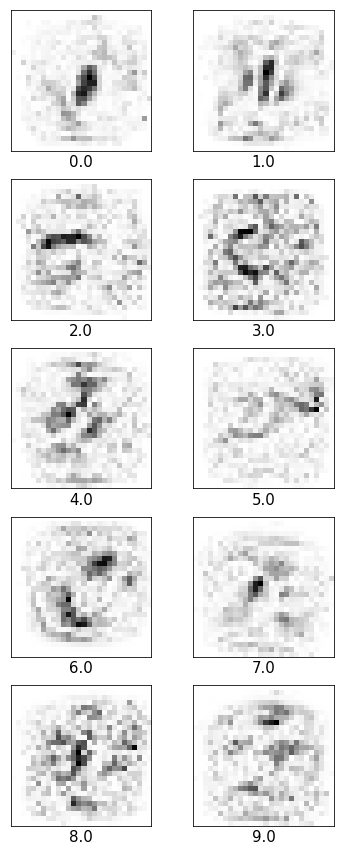

In [131]:
plot_image_grid(coefficients_df.abs(), pixel_columns = coefficients_df.columns[0:-1], label_column = 'class',
               figsize = (6,15), rows = 5, columns = 2)

In [39]:
pd.Series(lr_model.coef_[0])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
779   -0.001371
780    0.000000
781    0.000000
782    0.000000
783    0.000000
Length: 784, dtype: float64

In [40]:
pd.Series(lr_model.coef_[0]).describe()

count    784.000000
mean       0.000667
std        0.052316
min       -0.271281
25%       -0.014570
50%       -0.000021
75%        0.023256
max        0.137216
dtype: float64

In [49]:
lr_model.predict_proba(train_X_scaled)[0]

array([1.54364024e-05, 9.81883913e-01, 2.93278515e-03, 9.12622716e-04,
       3.20201911e-05, 5.50746882e-04, 5.80044069e-05, 8.58549755e-06,
       1.35702619e-02, 3.56236179e-05])

In [45]:
lr_model.scores_ 

{0: array([[0.88274779, 0.90759783, 0.91830905, 0.91638103, 0.90317052,
         0.89017424, 0.88424736, 0.88281919, 0.88131962, 0.88096258],
        [0.88612659, 0.91148736, 0.92248893, 0.91905987, 0.90784398,
         0.89619946, 0.8914845 , 0.88905558, 0.8857694 , 0.88598371],
        [0.88476925, 0.91155879, 0.91984569, 0.91805972, 0.90798686,
         0.89762823, 0.89105587, 0.89034148, 0.88884126, 0.88769824]]),
 1: array([[0.88274779, 0.90759783, 0.91830905, 0.91638103, 0.90317052,
         0.89017424, 0.88424736, 0.88281919, 0.88131962, 0.88096258],
        [0.88612659, 0.91148736, 0.92248893, 0.91905987, 0.90784398,
         0.89619946, 0.8914845 , 0.88905558, 0.8857694 , 0.88598371],
        [0.88476925, 0.91155879, 0.91984569, 0.91805972, 0.90798686,
         0.89762823, 0.89105587, 0.89034148, 0.88884126, 0.88769824]]),
 2: array([[0.88274779, 0.90759783, 0.91830905, 0.91638103, 0.90317052,
         0.89017424, 0.88424736, 0.88281919, 0.88131962, 0.88096258],
        [0.886

## Prediction

In [135]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
test['label'] = lr_model.predict(std_scaler.transform(test))

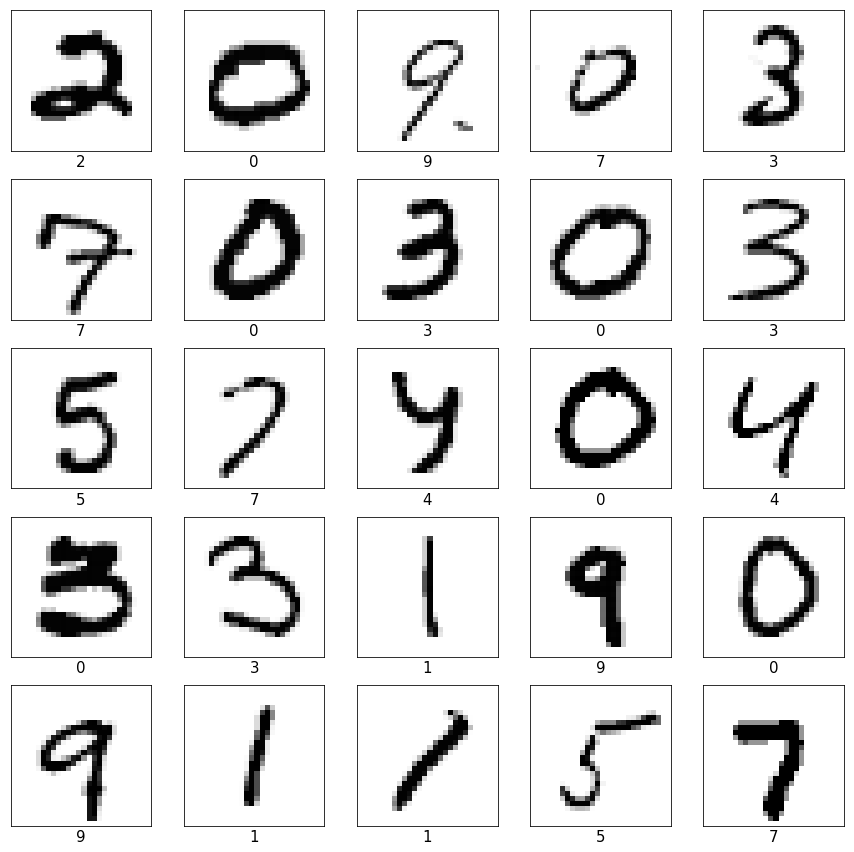

In [137]:
plot_image_grid(test, pixel_columns = test.columns[0:-1], label_column = 'label')

In [138]:
lr_submission = pd.DataFrame({'Label':test['label']})

In [144]:
lr_submission['ImageId'] = np.arange(len(lr_submission)) + 1

In [145]:
lr_submission.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,7,4
4,3,5


In [146]:
lr_submission.to_csv('SaveFiles/lr_submission.csv', index=False)